<a href="https://colab.research.google.com/github/thomasgrall/thomasgrall.github.io/blob/main/Private_jets_PREPROD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

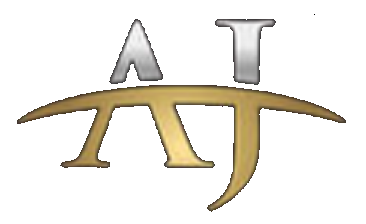

# DAILY CUSTOMERS










In [ ]:
#@title { run: "auto" }

#Cacher les warnings

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

#Affichera le dataframe en mode intéractif
#%load_ext google.colab.data_table

# Import des bases de données Customers, Daily planes et Suppliers

import pandas as pd
#from IPython.display import HTML
import matplotlib.pyplot as plt

#Import direct de Google sheet : ouvrir à tous le lien du classeur
#puis changer l'url : remplacer edit#gid=  par   export?format=csv&gid=

path1 = 'https://docs.google.com/spreadsheets/d/1m-gzFmbBcUWGDf5xRmPq8dM0QZVp10enZu7irax0vNw/export?format=csv&gid=58234931'
path2 = 'https://docs.google.com/spreadsheets/d/1BBfQUSrUaQFYRCco8c9_daOsaCuFUxWpvzbx24MTsJA/export?format=csv&gid=429677147'
path3 = 'https://docs.google.com/spreadsheets/d/1Wj0yYeCjPGwhiBvxhcly9etmoHz8GiHJKPvkqwim6Ws/export?format=csv&gid=838989633'


df_customers = pd.read_csv(path1)
df_suppliers = pd.read_csv(path2)
df_planes = pd.read_csv(path3)

# Merge des 3 dataframes en un DF final

df_final = pd.merge(df_planes, df_customers, how="left", left_on='PLANE', right_on='PLANE')
df_final = pd.merge(df_final, df_suppliers, how="left", left_on='AIRPORT IATA', right_on='AIRPORT IATA')


# Création de la colonne "Founded" et incrémentation selon présence de caractères dans Cust Mail 1

df_final['FOUNDED'] = 'Not found'

for index, row in df_final.iterrows():
  if pd.notna(row['E1']):
    df_final['FOUNDED'][index] = 'Found'


# Suppression des colonnes vides

df_final.dropna(how='all', axis=1, inplace=True)


# Remplacement des Nan par -

df_final = df_final.fillna(value='-')


#Convertir en lien clickable - Ne fonctionne pas!!!

#df_final = df_final.to_html(render_links=True, escape=False, columns='CUSTOMER MAIL1')

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------")
print("")
print("")

plt.pie(df_final['FOUNDED'].value_counts(), autopct='%1.2f%%')
plt.legend(["Found", "Not found"])
plt.show()

print("")
print("")

Date = '2021-12-01' #@param {type:"date"}
Contacts = "Found" #@param ["Found", "Not found"]

display(df_final[(df_final['FOUNDED'] == Contacts) & (df_final['DATE'] == Date)])

# EXPORT TO GOOGLE DRIVE

In [ ]:
#@title

# Export vers Google Drive

df_final.to_csv('daily_customers.csv', index=False)
!cp daily_customers.csv "drive/My Drive/Projets/Projets persos/Private jets"

# STATS

In [ ]:
#@title  { run: "auto" }

stats_Choice = "Planes and airports" #@param ["Planes and airports", "Planes and dates", "Planes and orders"]

if stats_Choice == "Planes and airports":
  display(df_final.pivot_table(values = 'FOUNDED', index = ['PLANE', 'AIRPORT IATA'], aggfunc = 'count').sort_values(by='FOUNDED', ascending=False).head(10))

if stats_Choice == "Planes and dates":
  display(df_final.pivot_table(values = 'FOUNDED', index = ['PLANE', 'DATE'], aggfunc = 'count').sort_values(by='FOUNDED', ascending=False).head(10))

if stats_Choice == "Planes and orders":
  display(df_final.pivot_table(values = 'ANSWER', index = ['PLANE', 'DATE'], aggfunc = 'count').sort_values(by='ANSWER', ascending=False).head(10))

# LET'S GO!!!!



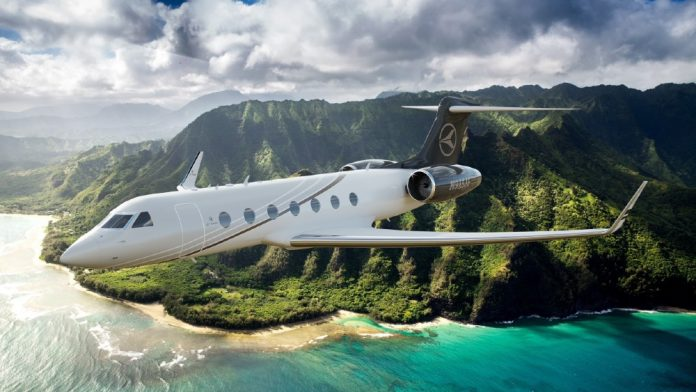